# Covid data exploration



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [22]:
dataset = pd.read_csv('daily_covid.csv', index_col=0)
dataset.shape

(422, 51)

In [23]:
dataset.head()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_novos,recuperados,obitos,internados_uci,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,ativos,internados_enfermaria,confirmados_0_9,confirmados_10_19,confirmados_20_29,confirmados_30_39,confirmados_40_49,confirmados_50_59,confirmados_60_69,confirmados_70_79,confirmados_80_plus,obitos_0_9,obitos_10_19,obitos_20_29,obitos_30_39,obitos_40_49,obitos_50_59,obitos_60_69,obitos_70_79,obitos_80_plus,Max_Temp,Min_Temp,Temperature,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity,Rain,Clear,Partially_cloudy
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.4,10.0,12.9,0.10,22.3,325.25,12.3,7.5,68.15,1,0,0
2020-02-27,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.4,10.4,14.5,0.00,16.9,321.58,11.8,3.9,72.08,0,1,0
2020-02-28,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.1,10.3,13.3,0.00,17.7,123.33,10.1,3.8,79.20,0,1,0
2020-02-29,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,13.1,15.1,3.53,24.7,253.13,9.6,6.8,82.29,1,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.1,14.0,15.3,0.68,38.6,235.63,9.5,4.3,92.37,1,0,0


## pearson correlation

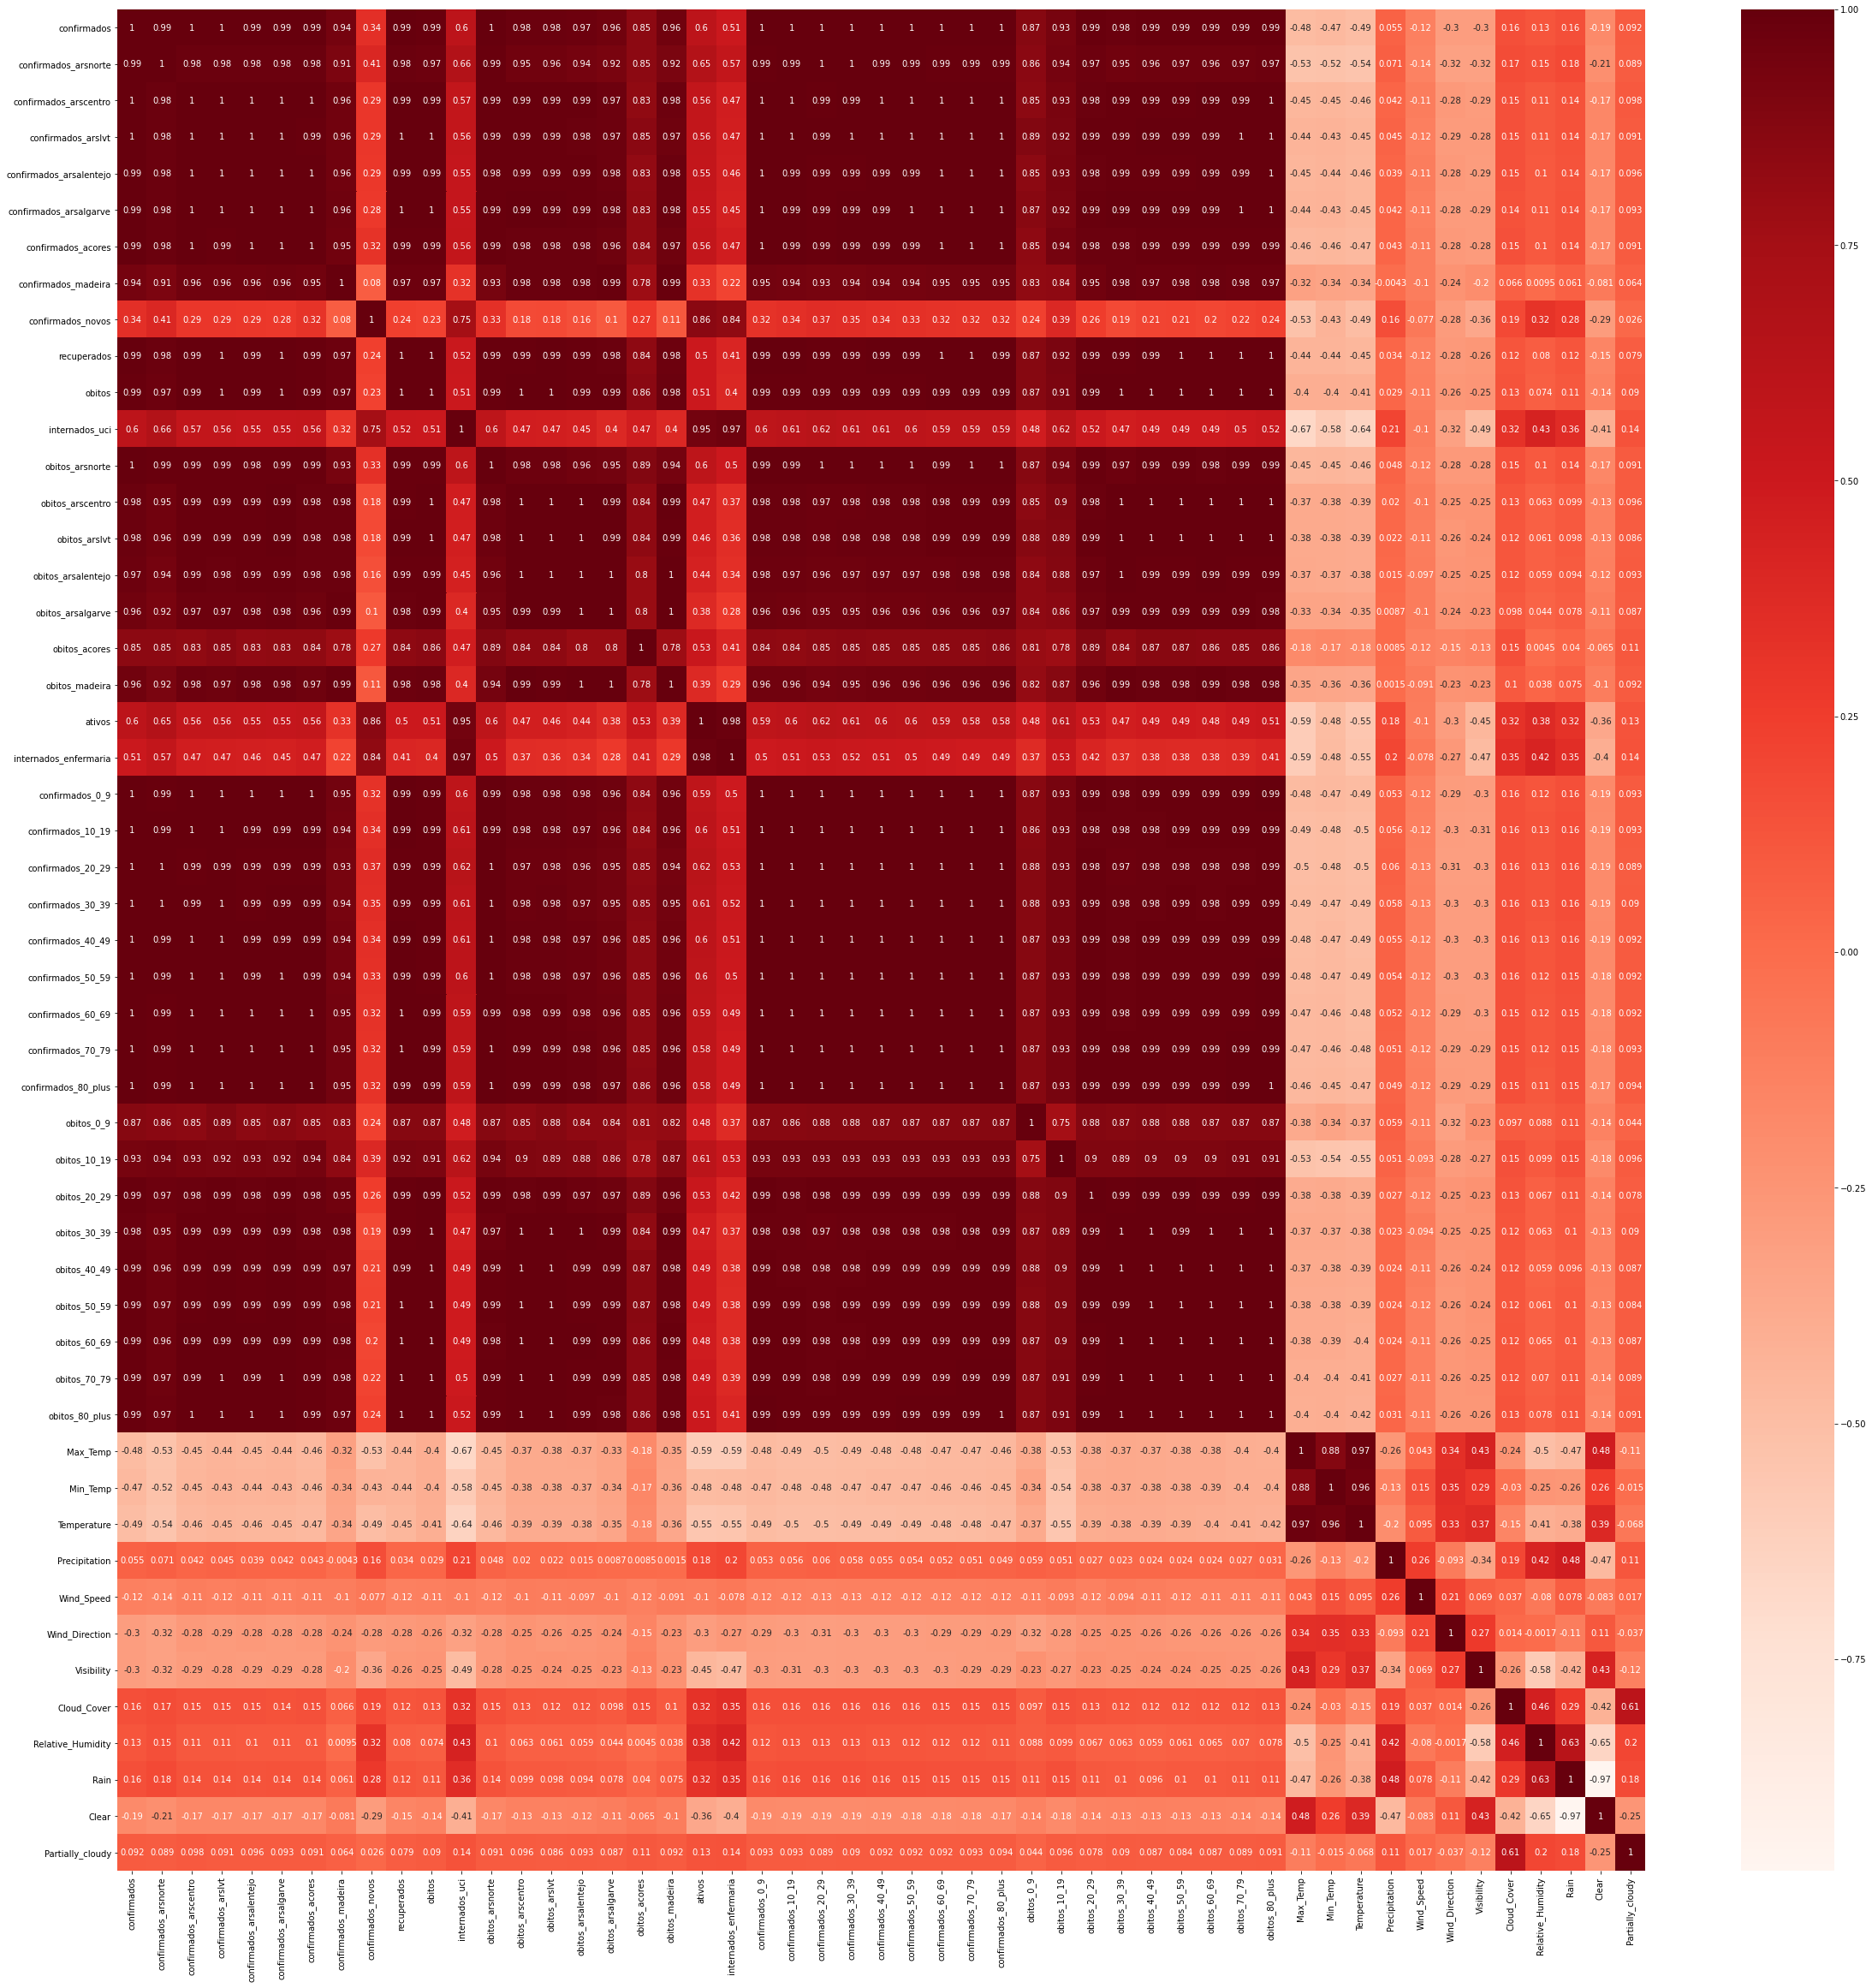

Date
2020-03-17        1
2020-03-18        1
2020-03-19        3
2020-03-20        6
2020-03-21       12
              ...  
2021-04-18    16945
2021-04-19    16946
2021-04-20    16951
2021-04-21    16952
2021-04-22    16956
Name: obitos, Length: 402, dtype: int64

In [24]:
#Using Pearson Correlation
plt.figure(figsize=(40,40))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(dataset['obitos'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Como entendemos que temos muitas features, após observar a matriz de correlações de pearson, fizemos um filtro preliminas de features, eliminando features cuja correlação fosse menor que  +/-0.29. Apesar das features Min_Temp e Max_Temp terem correlações iguais a -0.4, decidimos eliminar também, pois a correlação da Temperatur é superior a estas (-0.41) e representa a temperatura média.

In [25]:
dataset = dataset.drop(columns=['Wind_Speed','Wind_Direction','Visibility','Cloud_Cover','Relative_Humidity','Rain','Clear','Partially_cloudy'])

## Feature selection com SelectKBest

In [26]:
df_data = dataset.drop(columns='obitos')
df_label = dataset['obitos']

In [30]:
# Feature extraction
test = SelectKBest(score_func=chi2)
fit = test.fit_transform(df_data, df_label)

In [44]:
fit[:19]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  2.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.],
       [  4.,   2.,   1.,   1.,   0.,   4.,   0.,   2.,   1.,   0.],
       [  6.,   3.,   1.,   2.,   0.,   6.,   0.,   2.,   3.,   0.],
       [  9.,   5.,   1.,   3.,   0.,   9.,   0.,   2.,   4.,   1.],
       [ 13.,   8.,   1.,   4.,   0.,  13.,   0.,   2.,   6.,   2.],
       [ 21.,  15.,   1.,   5.,   0.,  21.,   1.,   3.,   8.,   2.],
       [ 30.,  22.,   1.,   6.,   0.,  30.,   2.,   4.,  10.,   3.],
       [ 39.,  27.,   1.,   9.,   0.,  39.,   2.,   6.,  14.,   4.],
       [ 41.,  27.,   2.,  10.,   0.,  41.,   2.,   6.,  14.,   4.],
       [ 59.,  36.,   3.,  17.,   

In [45]:
df_data[:19]

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_novos,recuperados,internados_uci,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,ativos,internados_enfermaria,confirmados_0_9,confirmados_10_19,confirmados_20_29,confirmados_30_39,confirmados_40_49,confirmados_50_59,confirmados_60_69,confirmados_70_79,confirmados_80_plus,obitos_0_9,obitos_10_19,obitos_20_29,obitos_30_39,obitos_40_49,obitos_50_59,obitos_60_69,obitos_70_79,obitos_80_plus,Max_Temp,Min_Temp,Temperature,Precipitation
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.4,10.0,12.9,0.10
2020-02-27,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.4,10.4,14.5,0.00
2020-02-28,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.1,10.3,13.3,0.00
2020-02-29,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,13.1,15.1,3.53
2020-01-03,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.1,14.0,15.3,0.68
2020-02-03,2,2,0,0,0,0,0,0,2,0,0.0,0,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.3,12.0,14.7,1.87
2020-03-03,4,2,1,1,0,0,0,0,2,0,0.0,0,0,0,0,0,0,0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.5,11.2,15.2,1.46
2020-04-03,6,3,1,2,0,0,0,0,2,0,0.0,0,0,0,0,0,0,0,6.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,14.5,16.3,0.00
2020-05-03,9,5,1,3,0,0,0,0,3,0,0.0,0,0,0,0,0,0,0,9.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,12.2,14.8,1.19


Resultados:
confirmados,confirmados_arsnorte, confirmados_arscentro,confirmados_arslvt, recuperados, ativos, confirmados_20_29, confirmados_30_39, confirmados_40_49, confirmados_50_59



## Feature selection of Lag Variables com Random Forest Regressor

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The code below uses RFE with a random forest predictive model and sets the desired number of input features to 10.

(A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.)

Selected Features:
confirmados_arsnorte
confirmados_arscentro
confirmados_arslvt
confirmados_arsalgarve
obitos_arscentro
internados_enfermaria
confirmados_0_9
confirmados_20_29
confirmados_40_49
confirmados_60_69


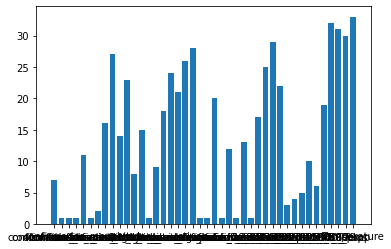

In [50]:
# separate into input and output variables
array = dataset.values
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=10)
fit = rfe.fit(df_data, df_label)
# report selected features
print('Selected Features:')
names = dataset.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataset.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

## Escolha final de features:
Após fazer estes dois métodos de selecção de features, e visto que o seus resultados fazem bastante overlap, decidimos escolher as features resultantes iguais, bem como manter as diferentes. 

confirmados,confirmados_arsnorte, confirmados_arscentro,confirmados_arslvt, recuperados, ativos, confirmados_20_29, confirmados_30_39, confirmados_40_49, confirmados_50_59


confirmados_arsnorte
confirmados_arscentro
confirmados_arslvt
confirmados_arsalgarve
obitos_arscentro
internados_enfermaria
confirmados_0_9
confirmados_20_29
confirmados_40_49
confirmados_60_69

In [51]:
df_data.columns

Index(['confirmados', 'confirmados_arsnorte', 'confirmados_arscentro',
       'confirmados_arslvt', 'confirmados_arsalentejo',
       'confirmados_arsalgarve', 'confirmados_acores', 'confirmados_madeira',
       'confirmados_novos', 'recuperados', 'internados_uci', 'obitos_arsnorte',
       'obitos_arscentro', 'obitos_arslvt', 'obitos_arsalentejo',
       'obitos_arsalgarve', 'obitos_acores', 'obitos_madeira', 'ativos',
       'internados_enfermaria', 'confirmados_0_9', 'confirmados_10_19',
       'confirmados_20_29', 'confirmados_30_39', 'confirmados_40_49',
       'confirmados_50_59', 'confirmados_60_69', 'confirmados_70_79',
       'confirmados_80_plus', 'obitos_0_9', 'obitos_10_19', 'obitos_20_29',
       'obitos_30_39', 'obitos_40_49', 'obitos_50_59', 'obitos_60_69',
       'obitos_70_79', 'obitos_80_plus', 'Max_Temp', 'Min_Temp', 'Temperature',
       'Precipitation'],
      dtype='object')

In [52]:
df_data = df_data.drop(columns=['confirmados_arsalentejo','confirmados_acores','confirmados_madeira','confirmados_novos','internados_uci','obitos_arsnorte',
                                'obitos_arslvt','obitos_arsalentejo',
       'obitos_arsalgarve', 'obitos_acores', 'obitos_madeira','ativos','confirmados_10_19','confirmados_70_79',
       'confirmados_80_plus', 'obitos_0_9', 'obitos_10_19', 'obitos_20_29',
       'obitos_30_39', 'obitos_40_49', 'obitos_50_59', 'obitos_60_69',
       'obitos_70_79', 'obitos_80_plus', 'Max_Temp', 'Min_Temp', 'Temperature',
       'Precipitation'])
df_data.shape

(422, 14)

In [53]:
df_data.columns

Index(['confirmados', 'confirmados_arsnorte', 'confirmados_arscentro',
       'confirmados_arslvt', 'confirmados_arsalgarve', 'recuperados',
       'obitos_arscentro', 'internados_enfermaria', 'confirmados_0_9',
       'confirmados_20_29', 'confirmados_30_39', 'confirmados_40_49',
       'confirmados_50_59', 'confirmados_60_69'],
      dtype='object')